<a href="https://colab.research.google.com/github/danielmsd1/ML/blob/main/nlp_sarcasm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group 2
Kea Chebet,
Daniel Simiyu and
Robert Korir

We used the sarcasm detection dataset here: https://drive.google.com/drive/folders/1xbwqaeFX3L6SMpL2kt01RXVzP-cwavCx?usp=sharing

#Using NLP to identify Sarcastic headlines

This is a binary classification, since a headline can either be sarcastic or not.

In [52]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow.keras.layers import Embedding,GlobalAveragePooling1D,Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

Importing the dataset.

In [53]:
dataset = pd.read_json('/content/drive/MyDrive/datasets/nlp_sarcasm/Sarcasm_Headlines_Dataset_v2.json',lines=True)
dataset.head(10)

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...
5,0,my white inheritance,https://www.huffingtonpost.com/entry/my-white-...
6,0,5 ways to file your taxes with less stress,https://www.huffingtonpost.com/entry/5-ways-to...
7,1,richard branson's global-warming donation near...,https://www.theonion.com/richard-bransons-glob...
8,1,shadow government getting too large to meet in...,https://politics.theonion.com/shadow-governmen...
9,0,lots of parents know this scenario,https://www.huffingtonpost.comhttp://pubx.co/6...


Get the headlines as a list of sentences

In [54]:
sentences = dataset['headline']
sentences = sentences.tolist()
# sentences

In [55]:
labels = dataset['is_sarcastic']
labels = labels.tolist()

In [56]:
urls = dataset['article_link']
urls = urls.tolist()
# urls

#Splitting Train and Test sets

Using 80% of the data to train the model

In [57]:
X_train, X_test,y_train,y_test = train_test_split(sentences,labels,train_size = 0.8,random_state =42,shuffle=True)

In [58]:
dataset.shape

(28619, 3)

In [59]:
print(len(X_train),len(X_test),len(y_test),len(y_test))

22895 5724 5724 5724


In [60]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
training_size = 20000

Convert the individual words into numbers and replacing any of the unknown words with the out of vocabulary (oov) token.

In [61]:
tokenizer = Tokenizer(num_words=vocab_size,oov_token="oov")
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
# word_index

In [62]:
training_sequences = tokenizer.texts_to_sequences(X_train)
training_sequences

[[27, 13, 109, 638, 17, 781, 67, 4774, 5, 43, 1939],
 [4227, 125, 1939, 6, 1549, 335, 761, 1940, 3529, 7704, 2, 4, 782],
 [5440, 1861, 105, 533, 504, 150, 163],
 [476, 1941, 941, 3237, 7705, 3238],
 [5441, 3239, 6, 228, 386, 367, 120, 879, 557, 61, 68, 2, 228, 390],
 [7706, 4228, 9928, 9, 6333, 6334, 2, 1368, 7, 3836, 2172, 6335, 8, 1199, 912],
 [243, 1, 9, 1, 31, 913, 4, 3837, 2043],
 [195, 7, 1862, 3, 27, 679, 58, 13, 38, 2414, 1, 8, 145, 251],
 [7707, 3240, 5442, 15, 2988, 3530],
 [2590, 3, 57, 5, 880, 166, 942, 3, 27, 220, 182, 51, 914, 1942, 9929],
 [881, 827, 6336, 2783, 2, 24, 1, 6, 3531, 2591],
 [1, 6337, 7708, 1432, 1433, 10, 4775, 913],
 [1623, 1624, 558, 35, 1035, 9, 2415, 1107, 8, 378, 21, 224],
 [7, 505, 1697, 3, 324, 828, 4229, 3241],
 [1625, 3532, 2, 4230, 1626, 10, 915, 7709, 2989],
 [534, 3242, 1108, 3, 1145, 4231, 2416, 9, 141, 1774, 8, 368, 1943, 1698],
 [3838, 95, 244, 278, 4776, 3533, 1, 1],
 [4777, 9930, 1944, 1550, 9931, 1, 6338, 9932, 3, 164, 616],
 [11, 4, 1863

In [63]:
training_padded = pad_sequences(training_sequences,maxlen=max_length,padding='post',truncating='post')

In [64]:
testing_sequences = tokenizer.texts_to_sequences(X_test)

In [65]:
testing_padded = pad_sequences(testing_sequences,maxlen=max_length,padding='post',truncating='post')

In [66]:
training_padded = np.array(training_padded)
training_labels = np.array(y_train)
testing_padded = np.array(testing_padded)
testing_labels = np.array(y_test)

In [67]:
print(training_padded.shape,training_labels.shape,testing_padded.shape,testing_labels.shape)
testing_labels

(22895, 100) (22895,) (5724, 100) (5724,)


array([0, 1, 1, ..., 0, 0, 1])

#Creating and training a model

In [68]:
model = tf.keras.Sequential([Embedding(vocab_size,embedding_dim,input_length=max_length),
                             GlobalAveragePooling1D(),
                             Dense(24,activation='relu'),
                             Dense(1,activation='sigmoid')
                             ])

In [69]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d_2 ( (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________
None


We are tracking the accuracy in order to know the number of correct predictions out of the total number of predictions made.

In [70]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# es = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=3)
# mc = ModelCheckpoint('best_model.h5',monitor='accuracy',mode='max',save_best_only=True,verbose=1)
history = model.fit(training_padded,training_labels,epochs=30,validation_data=(testing_padded,testing_labels),verbose=2)

Epoch 1/30
716/716 - 2s - loss: 0.6648 - accuracy: 0.6089 - val_loss: 0.5576 - val_accuracy: 0.7809
Epoch 2/30
716/716 - 2s - loss: 0.4144 - accuracy: 0.8355 - val_loss: 0.3834 - val_accuracy: 0.8311
Epoch 3/30
716/716 - 2s - loss: 0.3104 - accuracy: 0.8756 - val_loss: 0.3571 - val_accuracy: 0.8400
Epoch 4/30
716/716 - 2s - loss: 0.2641 - accuracy: 0.8943 - val_loss: 0.3340 - val_accuracy: 0.8550
Epoch 5/30
716/716 - 2s - loss: 0.2327 - accuracy: 0.9081 - val_loss: 0.3318 - val_accuracy: 0.8508
Epoch 6/30
716/716 - 2s - loss: 0.2073 - accuracy: 0.9209 - val_loss: 0.3375 - val_accuracy: 0.8522
Epoch 7/30
716/716 - 2s - loss: 0.1867 - accuracy: 0.9303 - val_loss: 0.3478 - val_accuracy: 0.8498
Epoch 8/30
716/716 - 2s - loss: 0.1706 - accuracy: 0.9367 - val_loss: 0.3587 - val_accuracy: 0.8527
Epoch 9/30
716/716 - 2s - loss: 0.1574 - accuracy: 0.9414 - val_loss: 0.3782 - val_accuracy: 0.8466
716/716 - 2s - loss: 0.1434 - accuracy: 0.9471 - val_loss: 0.3836 - val_accuracy: 0.8505
Epoch 11/30

In [71]:
def plotGraphs(history,string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string,'val_'+string])
  plt.show()
  

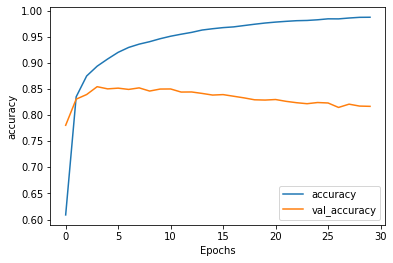

In [72]:
plotGraphs(history,"accuracy")

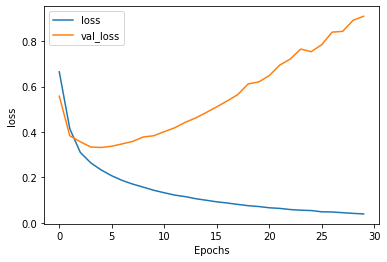

In [73]:
plotGraphs(history,"loss")